In [33]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [34]:
# Load the dataset
df = pd.read_csv("/content/globalterrorismdb_0718dist.csv", encoding='latin-1')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [36]:
df.shape

(181691, 135)

In [37]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [38]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'latitude',
    'longitude':'longitude','summary':'summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
     'nwound':'Wound'},inplace=True)

In [39]:
df = df[['Year','Month','day','Country','State','Region','City','latitude','longitude','Attacktype','kill','Wound','target1','summary','Group','Targettype','Weapon','motive']]
df.to_csv('cleaned_dataset.csv', index=False)
df.shape

(181691, 18)

Country with the most attacks: Iraq
--------------------------------------------------------


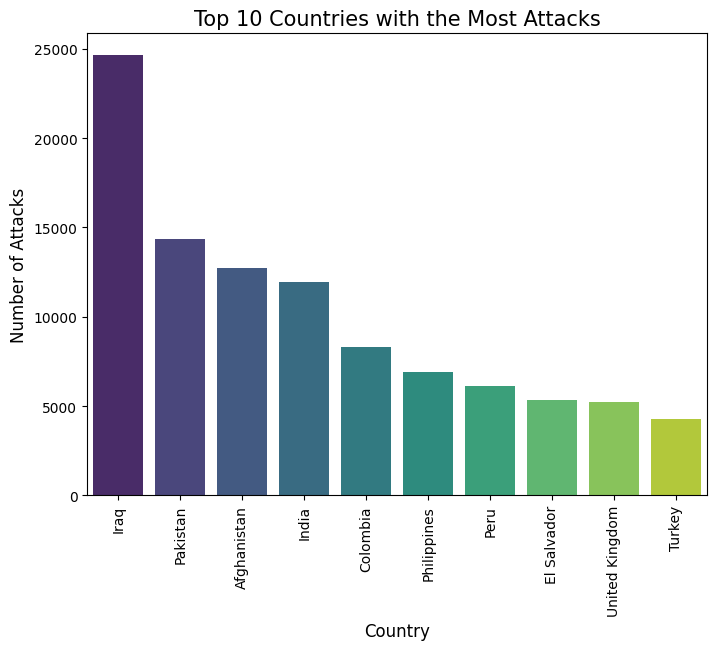

In [40]:
# 1. Country with the most attacks
country_most_attacks = df['Country'].value_counts().idxmax()
print("Country with the most attacks:", country_most_attacks)
print("--------------------------------------------------------")
plt.figure(figsize=(8, 6))
country_attacks = df['Country'].value_counts().head(10)
sns.barplot(x=country_attacks.index, y=country_attacks.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.title('Top 10 Countries with the Most Attacks', fontsize=15)
plt.show()

City with the most attacks: Baghdad
--------------------------------------------------------


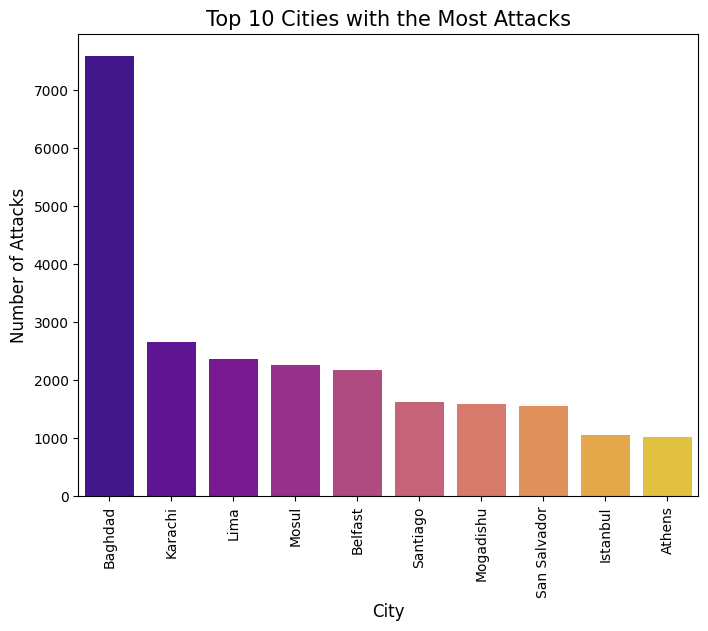

In [63]:
# 2. City with the most attacks
city_most_attacks = df['City'].value_counts().drop('Unknown').idxmax()
print("City with the most attacks:", city_most_attacks)
print("--------------------------------------------------------")
plt.figure(figsize=(8, 6))
city_attacks = df['City'].value_counts().drop('Unknown').head(10)
sns.barplot(x=city_attacks.index, y=city_attacks.values, palette='plasma')
plt.xticks(rotation=90)
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.title('Top 10 Cities with the Most Attacks', fontsize=15)
plt.show()


Region with the most attacks: Middle East & North Africa
---------------------------------------------------------


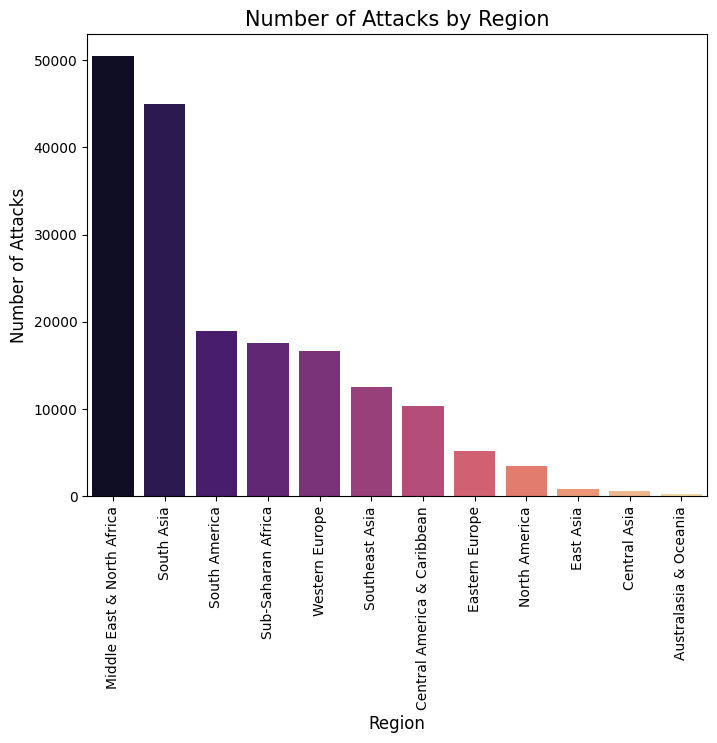

In [42]:
# 3. Region with the most attacks
region_most_attacks = df['Region'].value_counts().idxmax()
print("Region with the most attacks:", region_most_attacks)
print("---------------------------------------------------------")
plt.figure(figsize=(8, 6))
region_attacks = df['Region'].value_counts()
sns.barplot(x=region_attacks.index, y=region_attacks.values, palette='magma')
plt.xticks(rotation=90)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.title('Number of Attacks by Region', fontsize=15)
plt.show()

Year with the most attacks: 2014
-------------------------------------------------------


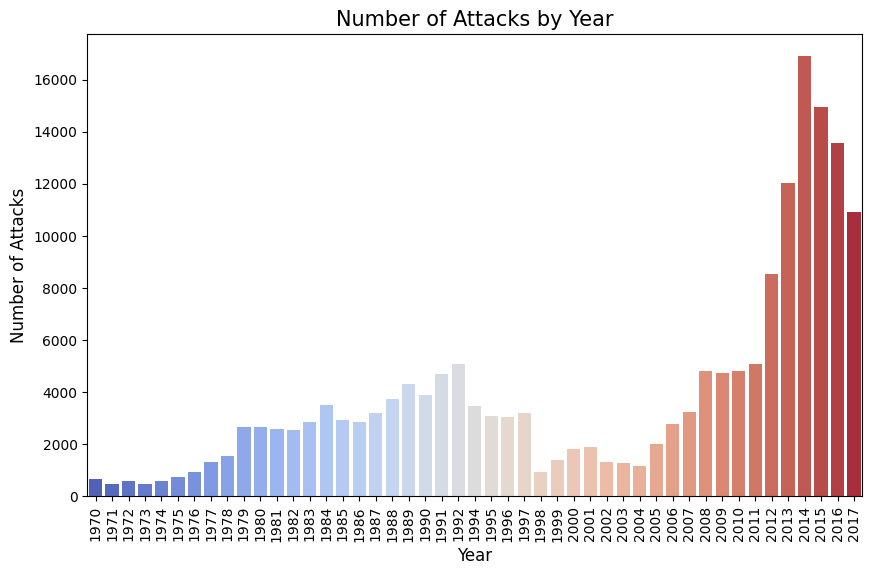

In [43]:
# 4. Year with the most attacks
year_most_attacks = df['Year'].value_counts().idxmax()
print("Year with the most attacks:", year_most_attacks)
print("-------------------------------------------------------")
plt.figure(figsize=(10, 6))
year_attacks = df['Year'].value_counts().sort_index()
sns.barplot(x=year_attacks.index, y=year_attacks.values, palette='coolwarm')
plt.xticks(rotation=90)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.title('Number of Attacks by Year', fontsize=15)
plt.show()


Group with the most attacks: Taliban
----------------------------------------------------------------


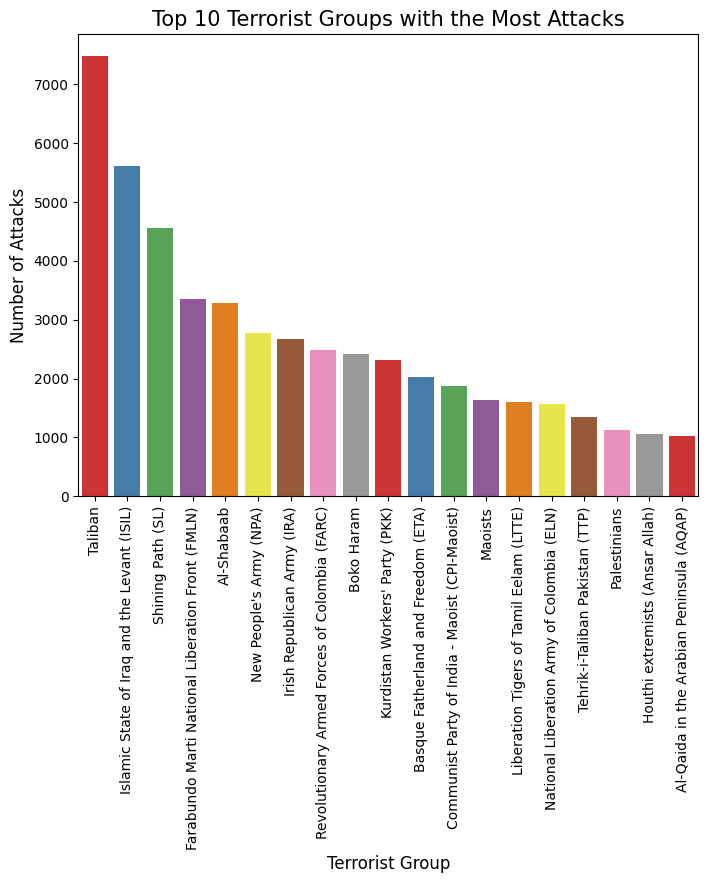

In [44]:
# 5. Group with the most attacks
group_most_attacks = df['Group'].value_counts().drop('Unknown').idxmax()
print("Group with the most attacks:", group_most_attacks)
print("----------------------------------------------------------------")
plt.figure(figsize=(8, 6))
group_attacks = df['Group'].value_counts().head(20).drop('Unknown')
sns.barplot(x=group_attacks.index, y=group_attacks.values, palette='Set1')
plt.xticks(rotation=90)
plt.xlabel('Terrorist Group', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.title('Top 10 Terrorist Groups with the Most Attacks', fontsize=15)
plt.show()

Most common attack type: Bombing/Explosion
--------------------------------------------------------

Frequency of Attack Types:
Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: Attacktype, dtype: int64
--------------------------------------------------------


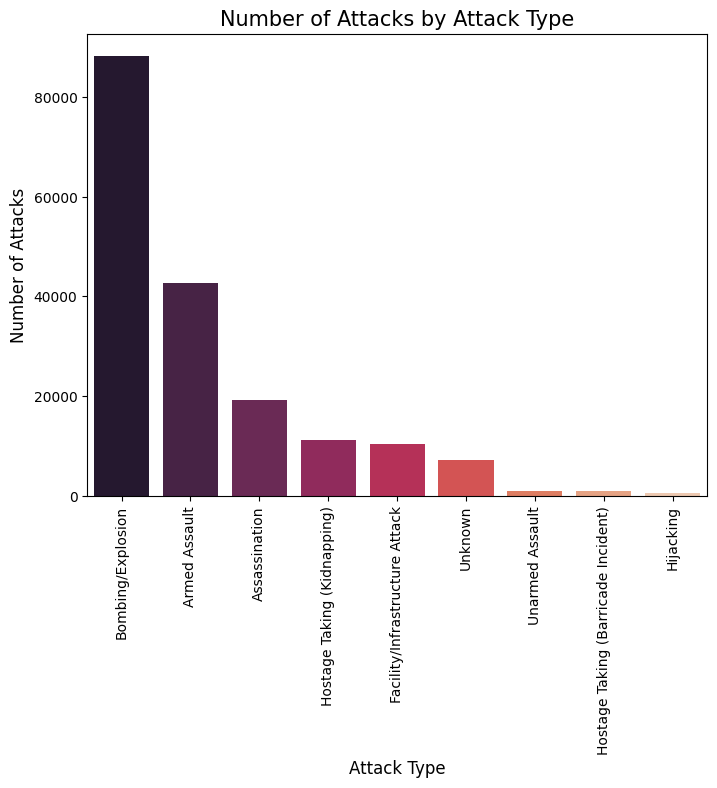

In [45]:
# 6. Most Attack Types
most_common_attack_type = df['Attacktype'].value_counts().idxmax()
print("Most common attack type:", most_common_attack_type)
print("--------------------------------------------------------")
# 7. Frequency of Attack Types
attack_type_counts = df['Attacktype'].value_counts()
print("\nFrequency of Attack Types:")
print(attack_type_counts)
print("--------------------------------------------------------")
plt.figure(figsize=(8, 6))
attack_type_counts = df['Attacktype'].value_counts()
sns.barplot(x=attack_type_counts.index, y=attack_type_counts.values, palette='rocket')
plt.xticks(rotation=90)
plt.xlabel('Attack Type', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.title('Number of Attacks by Attack Type', fontsize=15)
plt.show()

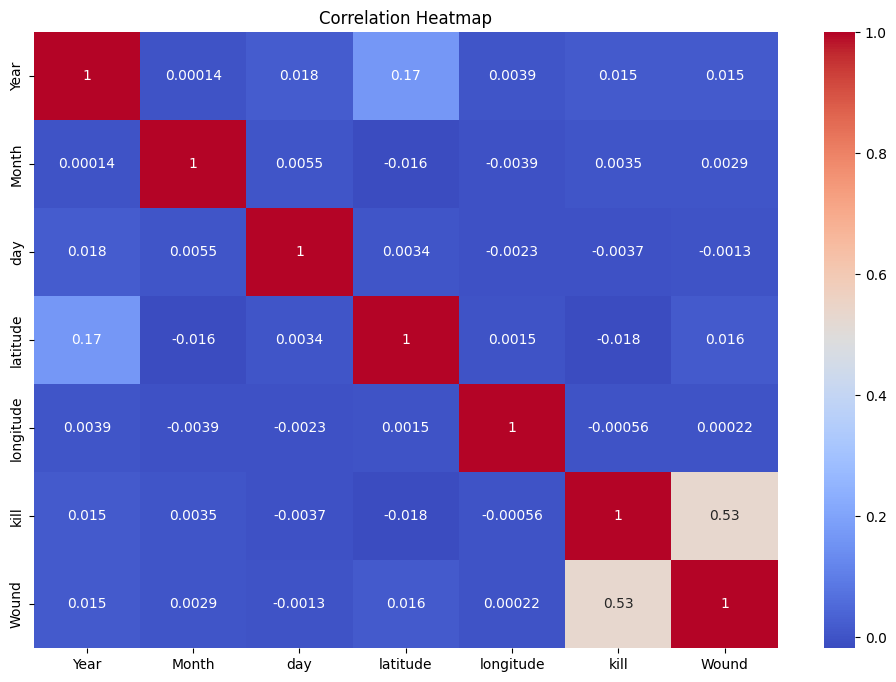

In [46]:
# 8. Correlation Heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Safest Country with the least attacks: Vatican City
------------------------------------------------------


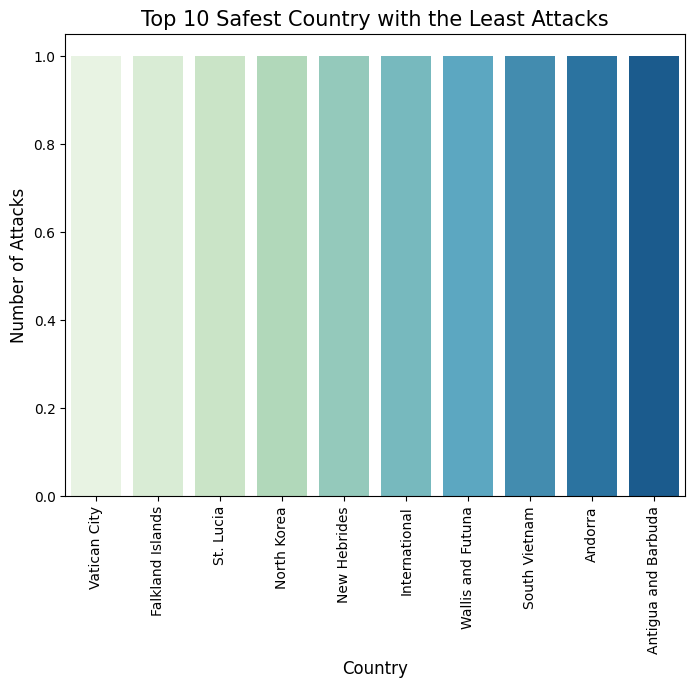

In [47]:
#9 Top 10 Safest Country with the Least Attacks
plt.figure(figsize=(8, 6))
state_attacks = df['Country'].value_counts().tail(10)
safest_state = state_attacks.idxmin()
print("Safest Country with the least attacks:", safest_state)
print('------------------------------------------------------')
sns.barplot(x=state_attacks.index, y=state_attacks.values, palette='GnBu')
plt.xticks(rotation=90)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.title('Top 10 Safest Country with the Least Attacks', fontsize=15)
plt.show()


Safest state with the least attacks: East Nusa Tenggara
---------------------------------------------------------


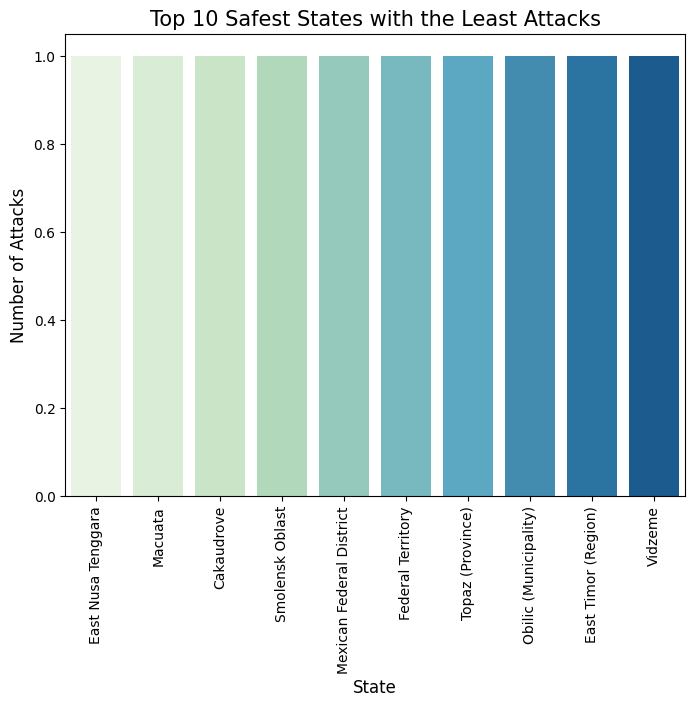

In [48]:
#10 Top 10 Safest States with the Least Attacks
plt.figure(figsize=(8, 6))
state_attacks = df['State'].value_counts().tail(10)
safest_state = state_attacks.idxmin()
print("Safest state with the least attacks:", safest_state)
print("---------------------------------------------------------")
sns.barplot(x=state_attacks.index, y=state_attacks.values, palette='GnBu')
plt.xticks(rotation=90)
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.title('Top 10 Safest States with the Least Attacks', fontsize=15)
plt.show()


Safest city with the least attacks: Mallah
-----------------------------------------------------


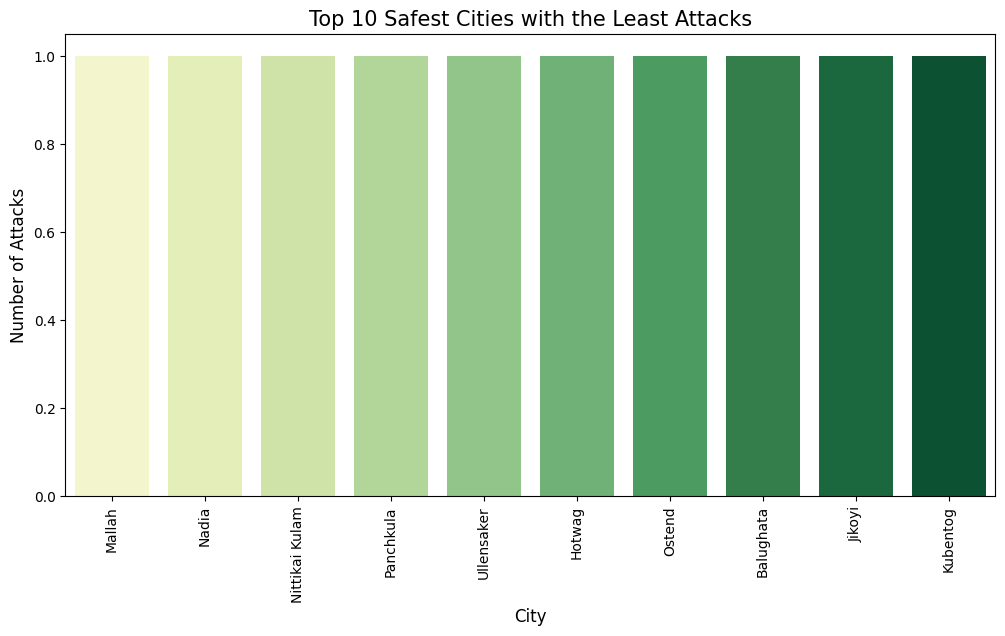

In [49]:
#11 Top 10 Safest Cities with the Least Attacks
plt.figure(figsize=(12, 6))
city_attacks = df['City'].value_counts().tail(10)
safest_city = city_attacks.idxmin()
print("Safest city with the least attacks:", safest_city)
print("-----------------------------------------------------")
sns.barplot(x=city_attacks.index, y=city_attacks.values, palette='YlGn')
plt.xticks(rotation=90)
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.title('Top 10 Safest Cities with the Least Attacks', fontsize=15)
plt.show()

Safest region with the least attacks: Australasia & Oceania
--------------------------------------------------------------


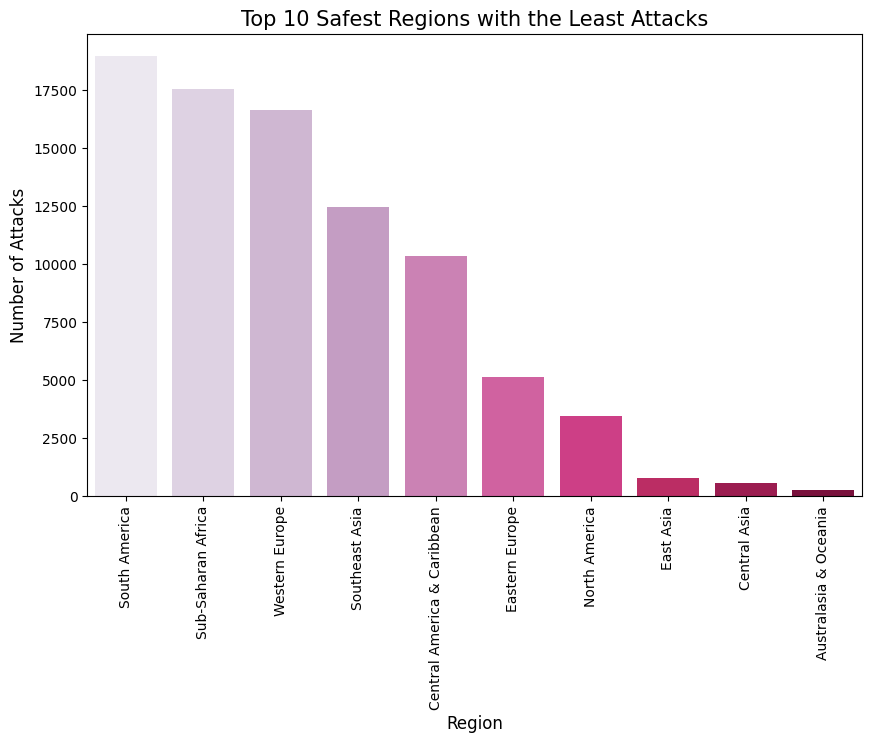

In [50]:
#12 Top 10 Safest Regions with the Least Attacks
plt.figure(figsize=(10, 6))
region_attacks = df['Region'].value_counts().tail(10)

safest_region = region_attacks.idxmin()
print("Safest region with the least attacks:", safest_region)
print("--------------------------------------------------------------")
sns.barplot(x=region_attacks.index, y=region_attacks.values, palette='PuRd')
plt.xticks(rotation=90)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.title('Top 10 Safest Regions with the Least Attacks', fontsize=15)
plt.show()

In [51]:
#13 Analysis of casualities in the year 2014
attacks_2014 = df[df['Year'] == 2014]
total_killed_2014 = attacks_2014['kill'].sum()
total_wounded_2014 = attacks_2014['Wound'].sum()
total_casualties_2014 = total_killed_2014 + total_wounded_2014
print("Total number of people killed in 2014:", total_killed_2014)
print("Total number of people wounded in 2014:", total_wounded_2014)
print("Total casualties (killed + wounded) in 2014:", total_casualties_2014)


Total number of people killed in 2014: 44490.0
Total number of people wounded in 2014: 41128.0
Total casualties (killed + wounded) in 2014: 85618.0


In [52]:
# 14 Analysis on dataset for incidents involving the Taliban as the responsible group
taliban_attacks = df[df['Group'] == 'Taliban']
attack_type = 'Bombing/Explosion'

taliban_attacks_with_attack_type = taliban_attacks[taliban_attacks['Attacktype'] == attack_type]

country_most_killed = taliban_attacks_with_attack_type['Country'].value_counts().idxmax()
city_most_killed = taliban_attacks_with_attack_type['City'].value_counts().idxmax()
region_most_killed = taliban_attacks_with_attack_type['Region'].value_counts().idxmax()
total_killed = taliban_attacks_with_attack_type['kill'].sum()

print("Country with the most people killed by Taliban: ", country_most_killed)
print("City with the most people killed by Taliban: ", city_most_killed)
print("Region with the most people killed by Taliban: ", region_most_killed)
print("Total number of people killed by Taliban: ", total_killed)


Country with the most people killed by Taliban:  Afghanistan
City with the most people killed by Taliban:  Kabul
Region with the most people killed by Taliban:  South Asia
Total number of people killed by Taliban:  10157.0


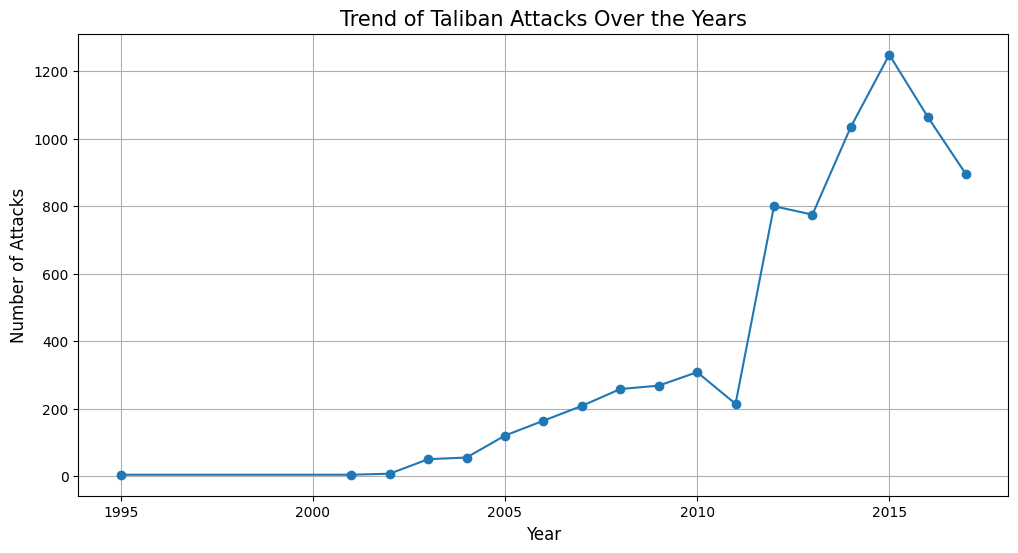

In [53]:
#18 Group the Taliban attacks by year and calculate the number of attacks each year
Taliban_attacks = df[df['Group'] == 'Taliban']
Taliban_attacks_per_year = Taliban_attacks['Year'].value_counts().sort_index()

# Plot the trend of Taliban attacks over the years
plt.figure(figsize=(12, 6))
plt.plot(Taliban_attacks_per_year.index, Taliban_attacks_per_year.values, marker='o', linestyle='-')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.title('Trend of Taliban Attacks Over the Years', fontsize=15)
plt.grid(True)
plt.show()


In [54]:
#15 Analysis on the "Armed Assault" attack type
armed_assault_attacks = df[df['Attacktype'] == 'Armed Assault']

group_frequency = armed_assault_attacks['Group'].value_counts().drop(['Taliban','Unknown'])

most_frequent_group = group_frequency.idxmax()
frequency_of_most_frequent_group = group_frequency.max()

print("Terrorist group that uses 'Armed Assault' type attack more frequently:", most_frequent_group)
print("Frequency of 'Armed Assault' attacks by this group:", frequency_of_most_frequent_group)

Terrorist group that uses 'Armed Assault' type attack more frequently: Farabundo Marti National Liberation Front (FMLN)
Frequency of 'Armed Assault' attacks by this group: 1594


In [55]:
#16 Analysis on the ISIL group
isil_attacks = df[df['Group'] == 'Islamic State of Iraq and the Levant (ISIL)']

attack_types_used_by_isil = isil_attacks['Attacktype'].value_counts().drop(['Bombing/Explosion','Unknown'])

most_frequent_attack_type = attack_types_used_by_isil.idxmax()
frequency_of_most_frequent_attack_type = attack_types_used_by_isil.max()

print("Attack type used most frequently by ISIL:", most_frequent_attack_type)
print("Frequency of this attack type used by ISIL:", frequency_of_most_frequent_attack_type)

Attack type used most frequently by ISIL: Hostage Taking (Kidnapping)
Frequency of this attack type used by ISIL: 608


In [56]:
#17 Analysis on the "Shining Path (SL)" group
shining_path_attacks = df[df['Group'] == 'Shining Path (SL)']

# Count the total number of attacks by Shining Path (SL)
total_attacks_by_sl = len(shining_path_attacks)
print("Total attacks by Shining Path (SL):", total_attacks_by_sl)


Total attacks by Shining Path (SL): 4555


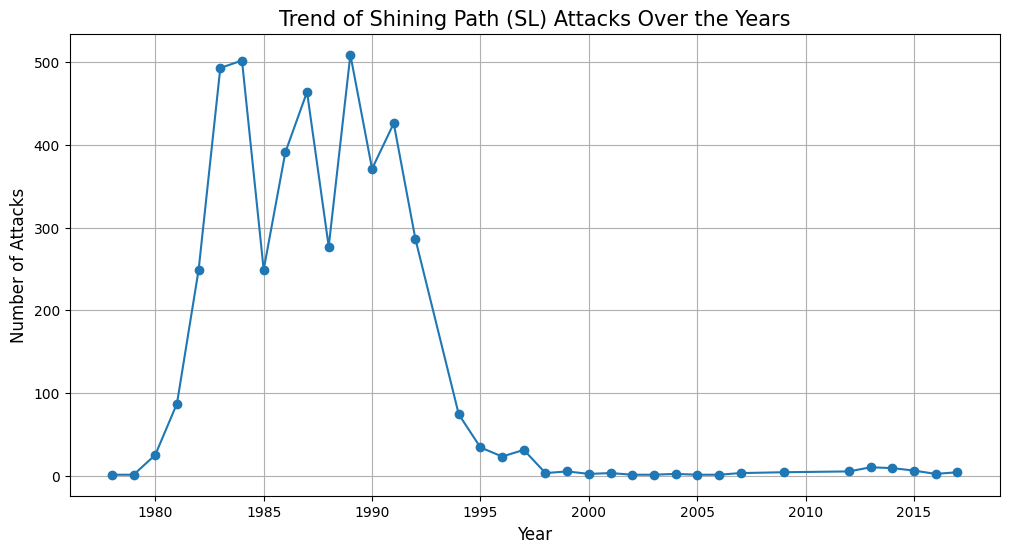

In [57]:
#18 Group the Shining Path (SL) attacks by year and calculate the number of attacks each year
sl_attacks_per_year = shining_path_attacks['Year'].value_counts().sort_index()

# Plot the trend of Shining Path (SL) attacks over the years
plt.figure(figsize=(12, 6))
plt.plot(sl_attacks_per_year.index, sl_attacks_per_year.values, marker='o', linestyle='-')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.title('Trend of Shining Path (SL) Attacks Over the Years', fontsize=15)
plt.grid(True)
plt.show()


In [58]:
#19 Find the most common attack types used by Shining Path (SL)
common_attack_types_by_sl = shining_path_attacks['Attacktype'].value_counts()

# Print the most common attack types
print("Most common attack types used by Shining Path (SL):")
print(common_attack_types_by_sl)


Most common attack types used by Shining Path (SL):
Bombing/Explosion                      2161
Armed Assault                          1151
Assassination                           834
Facility/Infrastructure Attack          170
Unknown                                 156
Hostage Taking (Kidnapping)              55
Hostage Taking (Barricade Incident)      24
Hijacking                                 3
Unarmed Assault                           1
Name: Attacktype, dtype: int64


In [59]:
#20 Analyze the geographical distribution of Shining Path (SL) attacks
top_10_target_countries = shining_path_attacks['Country'].value_counts().head(10)
print("Top 10 target countries for Shining Path (SL) attacks:")
print(top_10_target_countries)


Top 10 target countries for Shining Path (SL) attacks:
Peru         4541
Bolivia         6
Colombia        4
Brazil          2
Argentina       1
Mexico          1
Name: Country, dtype: int64


In [60]:
#21 Calculate the total number of people killed and wounded in Shining Path (SL) attacks
total_killed_by_sl = shining_path_attacks['kill'].sum()
total_wounded_by_sl = shining_path_attacks['Wound'].sum()

print("Total number of people killed in Shining Path (SL) attacks:", total_killed_by_sl)
print("Total number of people wounded in Shining Path (SL) attacks:", total_wounded_by_sl)


Total number of people killed in Shining Path (SL) attacks: 11601.0
Total number of people wounded in Shining Path (SL) attacks: 3031.0


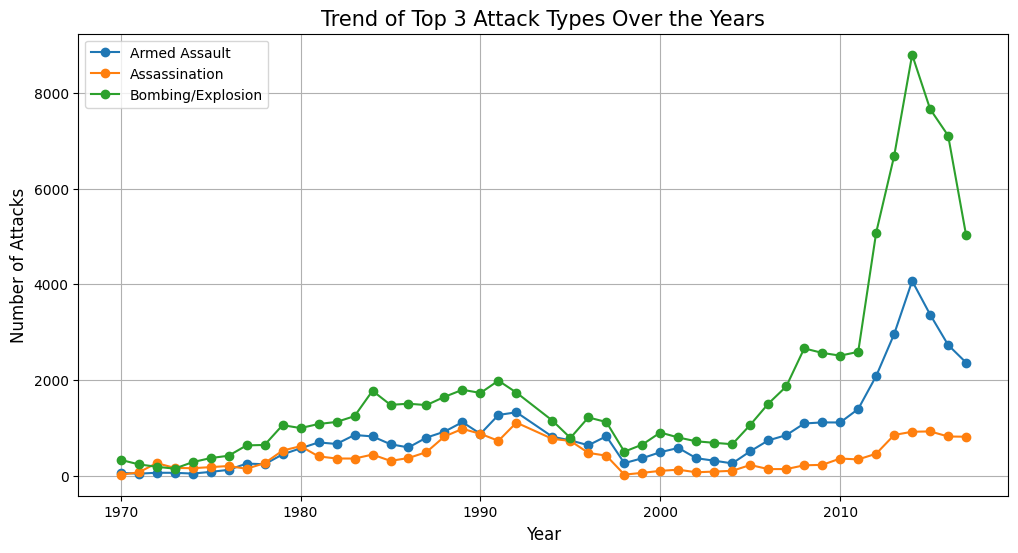

In [61]:
#22 Identify the top 3 Attack Types with the highest number of attacks
top_attacks = df['Attacktype'].value_counts().head(3).index.tolist()

# Filter the dataset to include only incidents involving the top 3 attack types
top_attacks_data = df[df['Attacktype'].isin(top_attacks)]

# Group the filtered data by year and count the number of attacks by each type for each year
group_yearly_counts = top_attacks_data.groupby(['Year', 'Attacktype']).size().unstack(fill_value=0)

# Create a line graph to compare the trends of these top 3 attack types over time
plt.figure(figsize=(12, 6))
for group in group_yearly_counts.columns:
    plt.plot(group_yearly_counts.index, group_yearly_counts[group], marker='o', label=group)

plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.title('Trend of Top 3 Attack Types Over the Years', fontsize=15)
plt.legend()
plt.grid(True)
plt.show()

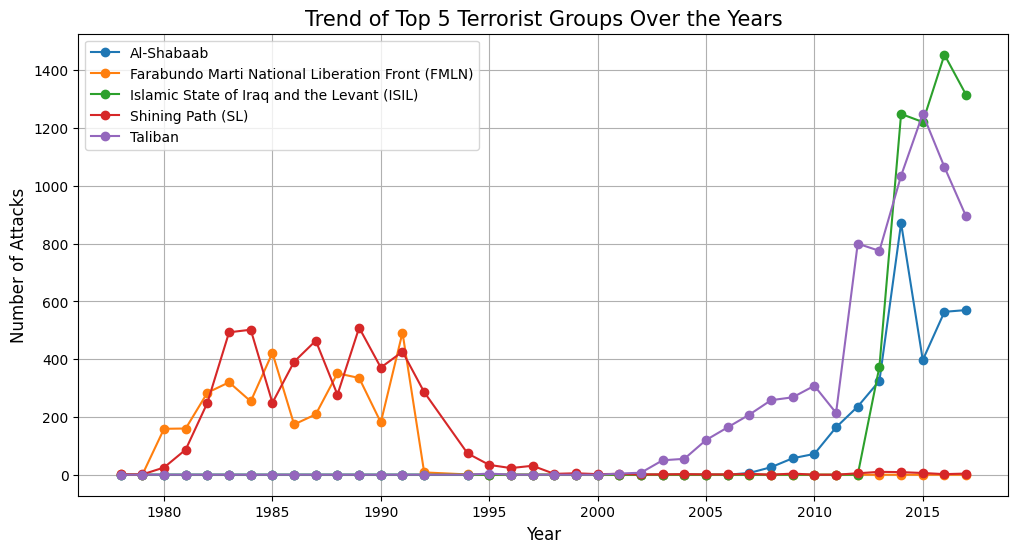

In [62]:
#23 Identify the top 5 terrorist groups with the highest number of attacks
top_groups = df['Group'].value_counts().head(6).drop("Unknown").index.tolist()

# Filter the dataset to include only incidents involving the top 5 groups
top_groups_data = df[df['Group'].isin(top_groups)]

# Group the filtered data by year and count the number of attacks by each group for each year
group_yearly_counts = top_groups_data.groupby(['Year', 'Group']).size().unstack(fill_value=0)

# Create a line graph to compare the trends of these top 5 groups over time
plt.figure(figsize=(12, 6))
for group in group_yearly_counts.columns:
    plt.plot(group_yearly_counts.index, group_yearly_counts[group], marker='o', label=group)

plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.title('Trend of Top 5 Terrorist Groups Over the Years', fontsize=15)
plt.legend()
plt.grid(True)
plt.show()


# **INSIGHTS:**
1) Country with the most attacks is "Iraq"

2) City with the most attacks is "Baghdad"

3) Region with the most attacks are "Middle East & North Africa"

4) Year with the most attacks is "2014"

* Total number of people killed in 2014 = 44490.0
*   Total number of people wounded in 2014 =  41128.0
*   Total casualties (killed + wounded) in 2014 = 85618.0

5) Group with the most attacks is "Taliban"
* Country with the most people killed by Taliban:  Afghanistan
* City with the most people killed by Taliban:  Kabul
* Region with the most people killed by Taliban:  South Asia
* Total number of people killed by Taliban:  10157.0

6) Most common attack type is "Bombing/Explosion" with frequency of "88255"

7) Country with the least attacks is "Vatican City"

8) State with the least attacks is "East Nusa Tenggara"

9) City with the least attacks is "Mallah"

10) Region with the least attacks is "Australasia & Oceania"

11) Taliban attacks mostly started from the year around 2002 and it became more from the year 2011

12) Terrorist group that uses "Armed Assault" type attack more frequently is Farabundo Marti National Liberation Front (FMLN) and
Frequency of 'Armed Assault' attacks by this group "1594"

13) The Attack type used most frequently by ISIL is Hostage Taking (Kidnapping)
and Frequency of this attack type used by ISIL is "608"

14) Here, I have choosen "Shinning Path(SL)" organization for example and derived some analysis on that organization...
* Total attacks by Shining Path (SL) are "4555" and this organization is most active from the years "1980 to 1997"
* The most common attack used by Shinning Path(SL) is "Bombing/Explosion" with the frequency of "2161" and "Armed Assault" with the frequency of "1151"
* The most attacked Country by Shinning Path(SL) Organization is "Peru"
* Total number of people killed in Shining Path (SL) attacks: 11601.0
* Total number of people wounded in Shining Path (SL) attacks: 3031.0

15) Here, First I have Identified top 3 attack types then compared it with the year. I have observed that from 1970 to 2004 all these three attack types "Bombing/Explosion", "Armed Assault" and "Assassination" were almost equal in frequencies but after 2007 Bombing/Explosion atack type become more and more popular.

16) Here, I identified the top 5 terrorist groups named "Al-Shabaab, FMLN, ISIL, SL and Taliban.
* Then i ploted the trend over the years. I observed that "FMLN and SL" are most active from 1970 to 1997.
* The other organization groups "Al-Shabaab, ISIL and Taliban" are most active from 2002.
* The period from the year "1997 to 2002" there are no activities from these organizations.